In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(86.75350972710112, -26.486485987694607),
 (77.14538250664566, 54.10551904818146),
 (76.8173102384228, 58.212771220309804),
 (41.23026387087438, 78.01502099741793),
 (1.5096256652587385, 90.32568813573255),
 (61.017577031143276, 12.718340895260923),
 (33.6543366318017, 160.05054212744147),
 (85.16658682726623, -135.2595353825796),
 (79.91811376211399, -21.566453573543555),
 (-65.41656648724845, -108.13702754332174),
 (-69.27968987294543, 76.88011617728336),
 (35.31350767791176, 137.71802735744654),
 (-63.44303313106248, 108.59934302062692),
 (87.3521550762847, -66.16975025207118),
 (-69.56997101631538, 100.66896509437737),
 (-61.218504900888775, -179.2987299329347),
 (63.94999470441647, -49.98474030832989),
 (12.741329713602099, 125.15777895230912),
 (-32.72108292124944, 1.6908459009205217),
 (-88.51014503476755, 163.4091460526251),
 (-29.014633828529412, 144.99274544273362),
 (-51.05659373206568, -78.90608369045951),
 (68.6699930796112, 47.111962036070764),
 (1.3901256460614633, 138.

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import the requests library.
import requests

#Import the API Key.

from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=76635d6174514bddaec14e4a148c8676


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 13 | amderma
City not found. Skipping...
Processing Record 4 of Set 13 | kyzyl-suu
Processing Record 5 of Set 13 | meulaboh
Processing Record 6 of Set 13 | hof
Processing Record 7 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 13 | tuktoyaktuk
Processing Record 9 of Set 13 | punta arenas
Processing Record 10 of Set 13 | saint-philippe
Processing Record 11 of Set 13 | iida
Processing Record 12 of Set 13 | albany
Processing Record 13 of Set 13 | qaanaaq
Processing Record 14 of Set 13 | vaini
Processing Record 15 of Set 13 | nuuk
Processing Record 16 of Set 13 | cabadiangan
Processing Record 17 of Set 13 | luderitz
Processing Record 18 of Set 13 | bluff
Processing Record 19 of Set 13 | roma
Processing Record 20 of Set 13 |

Processing Record 33 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 16 | bambous virieux
Processing Record 35 of Set 16 | awjilah
Processing Record 36 of Set 16 | zhezkazgan
Processing Record 37 of Set 16 | shingu
Processing Record 38 of Set 16 | cidreira
Processing Record 39 of Set 16 | brooks
Processing Record 40 of Set 16 | falealupo
City not found. Skipping...
Processing Record 41 of Set 16 | miranorte
City not found. Skipping...
Processing Record 42 of Set 16 | revda
Processing Record 43 of Set 16 | maroua
Processing Record 44 of Set 16 | kaitangata
Processing Record 45 of Set 16 | ribeira grande
Processing Record 46 of Set 16 | chambas
Processing Record 47 of Set 16 | muros
Processing Record 48 of Set 16 | jalingo
Processing Record 49 of Set 16 | kangaatsiaq
Processing Record 50 of Set 16 | yangambi
Processing Record 1 of Set 17 | eyl
Processing Record 2 of Set 17 | melo
Processing Record 3 of Set 17 | bengkulu
Processing Record 4 of Set 17 | carb

Processing Record 15 of Set 20 | kashi
Processing Record 16 of Set 20 | taloqan
Processing Record 17 of Set 20 | zhuanghe
Processing Record 18 of Set 20 | semme
Processing Record 19 of Set 20 | puerto colombia
Processing Record 20 of Set 20 | belturbet
Processing Record 21 of Set 20 | muroto
Processing Record 22 of Set 20 | balakhta
Processing Record 23 of Set 20 | mende
Processing Record 24 of Set 20 | kangaba
Processing Record 25 of Set 20 | ixtapa
Processing Record 26 of Set 20 | los llanos de aridane
Processing Record 27 of Set 20 | minot
Processing Record 28 of Set 20 | carnarvon
Processing Record 29 of Set 20 | san cristobal
Processing Record 30 of Set 20 | olean
Processing Record 31 of Set 20 | virginia beach
Processing Record 32 of Set 20 | gat
Processing Record 33 of Set 20 | acapulco
Processing Record 34 of Set 20 | auki
Processing Record 35 of Set 20 | portel
Processing Record 36 of Set 20 | qeshm
Processing Record 37 of Set 20 | najran
Processing Record 38 of Set 20 | toppe

Processing Record 49 of Set 23 | tezpur
Processing Record 50 of Set 23 | anchorage
Processing Record 1 of Set 24 | grand gaube
Processing Record 2 of Set 24 | kuminskiy
Processing Record 3 of Set 24 | ancud
Processing Record 4 of Set 24 | burglengenfeld
Processing Record 5 of Set 24 | lorengau
Processing Record 6 of Set 24 | revelstoke
Processing Record 7 of Set 24 | sembe
Processing Record 8 of Set 24 | bagaha
Processing Record 9 of Set 24 | basco
Processing Record 10 of Set 24 | acarau
Processing Record 11 of Set 24 | mehamn
Processing Record 12 of Set 24 | halifax
Processing Record 13 of Set 24 | henties bay
Processing Record 14 of Set 24 | brownsville
Processing Record 15 of Set 24 | saint anthony
Processing Record 16 of Set 24 | polunochnoye
Processing Record 17 of Set 24 | hami
Processing Record 18 of Set 24 | satitoa
City not found. Skipping...
Processing Record 19 of Set 24 | tusnad
Processing Record 20 of Set 24 | sehithwa
Processing Record 21 of Set 24 | san francisco
Process

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kyzyl-Suu,42.3414,78.0056,55.38,48,94,4.41,KG,2021-05-26 22:01:16
1,Meulaboh,4.1363,96.1285,78.15,89,100,15.86,ID,2021-05-26 22:03:32
2,Hof,50.3167,11.9167,47.44,84,100,8.99,DE,2021-05-26 22:03:32
3,Tuktoyaktuk,69.4541,-133.0374,31.77,79,93,9.55,CA,2021-05-26 22:03:32
4,Punta Arenas,-53.1500,-70.9167,35.11,64,47,14.36,CL,2021-05-26 22:02:25
5,Saint-Philippe,-21.3585,55.7679,71.19,83,31,2.71,RE,2021-05-26 22:03:33
6,Iida,35.5197,137.8207,57.47,100,100,1.86,JP,2021-05-26 22:03:33
7,Albany,42.6001,-73.9662,72.18,86,64,3.00,US,2021-05-26 22:00:08
8,Qaanaaq,77.4840,-69.3632,34.90,78,30,2.95,GL,2021-05-26 22:03:33
9,Vaini,-21.2000,-175.2000,78.96,73,20,10.36,TO,2021-05-26 22:03:33


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kyzyl-Suu,KG,2021-05-26 22:01:16,42.3414,78.0056,55.38,48,94,4.41
1,Meulaboh,ID,2021-05-26 22:03:32,4.1363,96.1285,78.15,89,100,15.86
2,Hof,DE,2021-05-26 22:03:32,50.3167,11.9167,47.44,84,100,8.99
3,Tuktoyaktuk,CA,2021-05-26 22:03:32,69.4541,-133.0374,31.77,79,93,9.55
4,Punta Arenas,CL,2021-05-26 22:02:25,-53.1500,-70.9167,35.11,64,47,14.36
5,Saint-Philippe,RE,2021-05-26 22:03:33,-21.3585,55.7679,71.19,83,31,2.71
6,Iida,JP,2021-05-26 22:03:33,35.5197,137.8207,57.47,100,100,1.86
7,Albany,US,2021-05-26 22:00:08,42.6001,-73.9662,72.18,86,64,3.00
8,Qaanaaq,GL,2021-05-26 22:03:33,77.4840,-69.3632,34.90,78,30,2.95
9,Vaini,TO,2021-05-26 22:03:33,-21.2000,-175.2000,78.96,73,20,10.36


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622066747.590771

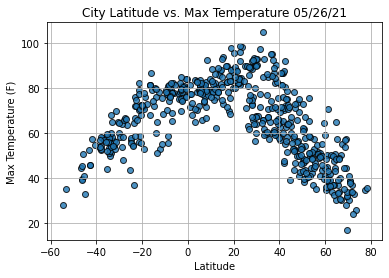

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

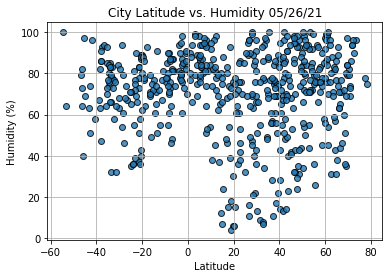

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

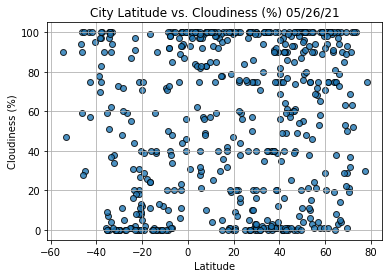

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

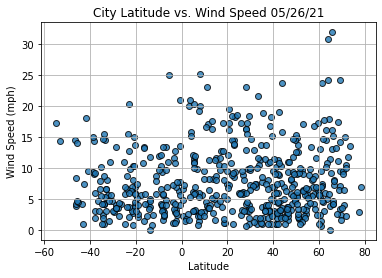

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2021-05-26 22:03:34
Lat                         -46.6
Lng                      168.3333
Max Temp                    44.37
Humidity                       79
Cloudiness                     94
Wind Speed                  14.52
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kyzyl-Suu,KG,2021-05-26 22:01:16,42.3414,78.0056,55.38,48,94,4.41
1,Meulaboh,ID,2021-05-26 22:03:32,4.1363,96.1285,78.15,89,100,15.86
2,Hof,DE,2021-05-26 22:03:32,50.3167,11.9167,47.44,84,100,8.99
3,Tuktoyaktuk,CA,2021-05-26 22:03:32,69.4541,-133.0374,31.77,79,93,9.55
6,Iida,JP,2021-05-26 22:03:33,35.5197,137.8207,57.47,100,100,1.86


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

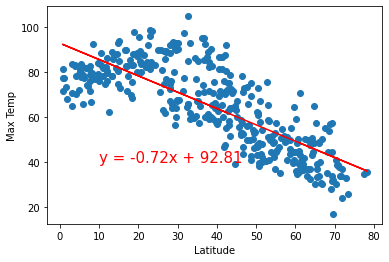

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

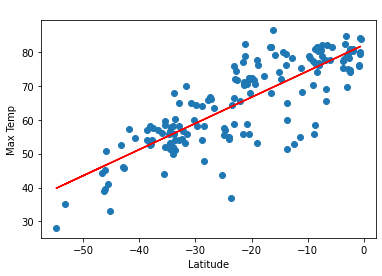

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


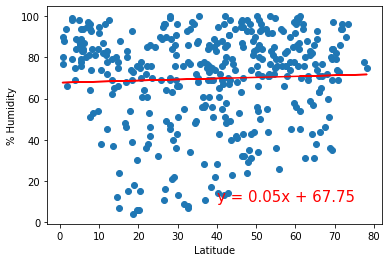

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

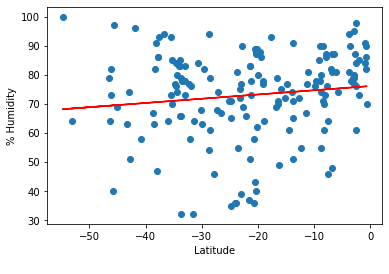

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

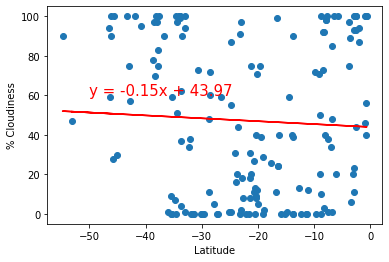

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

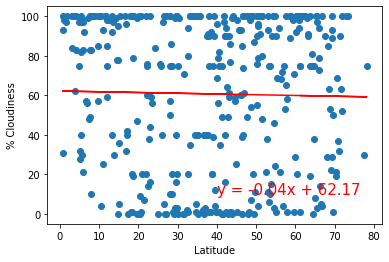

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

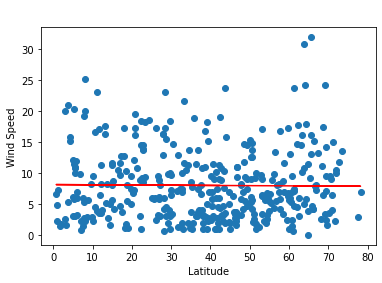

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

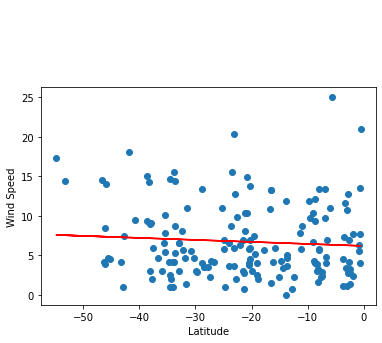

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))